## Random Selection

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [39]:
dataFrame = pd.read_csv("Ads_CTR_Optimisation.csv")

In [40]:
dataFrame

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [41]:
import random

In [42]:
N = 10000
d = 10
toplam = 0
secilenler = []

In [43]:
for i in range(0, N):
    ad = random.randrange(d)
    secilenler.append(ad)
    odul = dataFrame.values[i, ad]
    toplam = toplam + odul
    print(secilenler)

, 5, 9, 8, 7, 5, 9, 8, 5, 1, 1, 6, 4, 6, 4, 2, 0, 9, 2, 2, 8, 1, 8, 1, 6, 2, 8, 0, 2, 1, 6, 3, 1, 1, 6, 7, 0, 9, 9, 2, 4, 6, 6, 6, 4, 3, 9, 0, 3, 3, 7, 5, 5, 3, 1, 8, 5, 7, 3, 1, 7, 3, 0, 8, 0, 3, 8, 5, 5, 6, 7, 2, 9, 1, 3, 0, 4, 4, 9, 5, 1, 0, 7, 5, 1, 2, 7, 0, 1, 3, 3, 1, 6, 3, 1, 6, 3, 0, 3, 2, 8, 1, 0, 6, 2, 4, 5, 2, 6, 4, 3, 6, 8, 9, 4, 8, 1, 0, 6, 8, 6, 8, 4, 2, 7, 6, 3, 5, 2, 0, 4, 1, 3, 0, 9, 9, 4, 7, 8, 9, 5, 6, 0, 9, 3, 1, 3, 8, 2, 7, 1, 9, 5, 1, 0, 9, 8, 5, 5, 5, 3, 9, 2, 0, 9, 2, 5, 1, 4, 1, 6, 4, 8, 9, 3, 9, 0, 8, 1, 5, 9, 6, 1, 7, 3, 3, 4, 6, 4, 7, 6, 6, 0, 3, 0, 9, 0, 9, 9, 5, 7, 7, 7, 2, 9, 9, 2, 7, 4, 9, 8, 9, 5, 8, 5, 3, 2, 2, 9, 2, 4, 3, 7, 3, 6, 3, 4, 2, 3, 6, 5, 3, 9, 2, 0, 1, 9, 2, 3, 3, 6, 7, 9, 8, 0, 8, 2, 7, 3, 4, 5, 7, 2, 4, 4, 4, 5, 2, 9, 5, 2, 6, 6, 5, 7, 9, 3, 4, 7, 7, 9, 3, 6, 7, 1, 7, 4, 7, 4, 3, 8, 9, 3, 8, 2, 1, 2, 5, 5, 5, 2, 0, 5, 5, 5, 8, 9, 0, 2, 7, 6, 7, 5, 5, 3, 4, 5, 8, 9, 5, 4, 9, 2, 4, 3, 5, 9, 0, 9, 1, 1, 5, 5, 3, 7, 0, 6, 9, 3, 6, 5, 0, 8, 1,

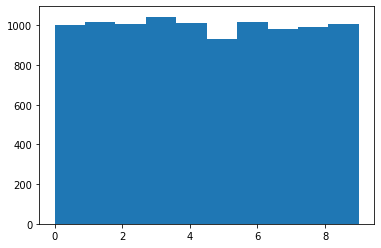

In [44]:
plt.hist(secilenler)
plt.show()

## UCB

In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [46]:
dataFrame = pd.read_csv("Ads_CTR_Optimisation.csv")

In [47]:
dataFrame

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [48]:
import math

In [49]:
N = 10000                    # 10.000 tıklama
d = 10                       # toplam 10 ilan var
oduller = [0] * d            # İlk basta butun ilanların odulu 0
tiklamalar = [0] * d         # O ana kadarki tıklamalar
toplam = 0                   # toplam odul
secilenler = []

In [51]:
for n in range(1,N):

    ad = 0                   # Seçilen ilan
    max_ucb = 0

    for i in range(0,d):

        if(tiklamalar[i] > 0):
            ortalama = oduller[i] / tiklamalar[i]
            delta = math.sqrt(3/2* math.log(n)/tiklamalar[i])
            ucb = ortalama + delta
        else:
            ucb = N*10

        if max_ucb < ucb:                         # Max'tan büyük bir ucb çıktı
            max_ucb = ucb
            ad = i   

    secilenler.append(ad)
    tiklamalar[ad] = tiklamalar[ad]+ 1
    odul = dataFrame.values[n,ad]                   # verilerdeki n. satır = 1 ise odul 1
    oduller[ad] = oduller[ad]+ odul
    toplam = toplam + odul

In [52]:
print('Toplam Odul:')   
print(toplam)

Toplam Odul:
2210


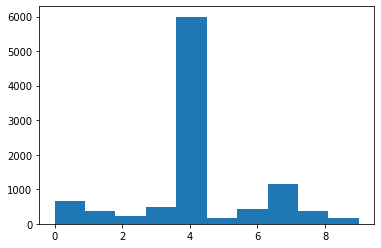

In [53]:
plt.hist(secilenler)
plt.show()